In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.model_selection import train_test_split # trainsplit for buiding

In [2]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values # to get 2D numpy array
y = df['Survived'].values # 1D

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.predict([[3, True, 22, 1, 0, 7.25]])) # 3 Pclass, male, 22 yo, has siblings, no parents, fare 7.25)

[0]


### Prediction says that the passenger will not survive

### eveluation of the model

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.linear_model import LogisticRegression

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))
print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

Decision Tree
  accuracy: 0.7790135212340507
  precision: 0.7172917633690684
  recall: 0.7062371452077334
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


### gini and entropy 

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()

Decision Tree - gini
accuracy: 0.7778962737256396
precision: 0.7146938285705532
recall: 0.7098368325281109 


Decision Tree - entropy
accuracy: 0.7744937472227512
precision: 0.7044888639192612
recall: 0.7211442878668006 




### Visualization

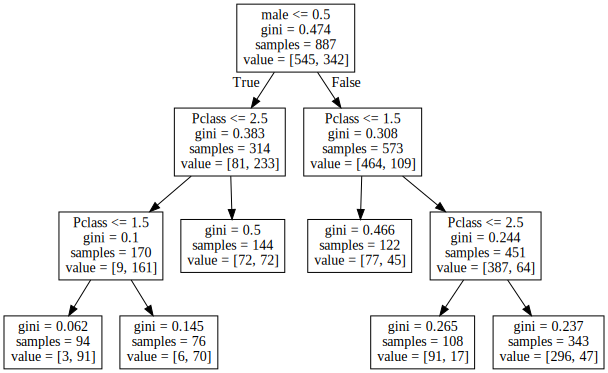

In [8]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)
graph

### Pre-Pruning

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)

## Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)
print("best score:", gs.best_score_)

best params: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
best score: 0.7746390877915417
